## Unsupervised Learning in Machine Learning - Clustering

In this notebook you will get familiar with K means clustering algorithm using PyCaret python package with preprocessed "Pima Indians Diabetes Database" dataset



## Import libraries

In [4]:
!pip install pycaret # install pycaret this way if you are running this notebook in google colab environment.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.5

In [5]:
from pycaret.clustering import * #importing pycaret clustering module
import plotly.express as px

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
# load the preprocessed data

url = "https://raw.githubusercontent.com/thilinib/CBM101/main/E_Macine_Learning/data/preprocessed_diabetes.csv"
df = pd.read_csv(url)

In [7]:
# check the shape of the preprocessed data
df.shape

(394, 9)

In [8]:
# check how preprocessed data looks like
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66,23,94,28.1,0.167,21,0
1,0,137.0,40,35,168,43.1,2.288,33,1
2,3,78.0,50,32,88,31.0,0.248,26,1
3,2,197.0,70,45,543,30.5,0.158,53,1
4,1,189.0,60,23,846,30.1,0.398,59,1


Let's try to cluster this data. Starting with the seaborn scatterplot. Here, we will plot Insulin vs Glucose.

<Axes: xlabel='Insulin', ylabel='Glucose'>

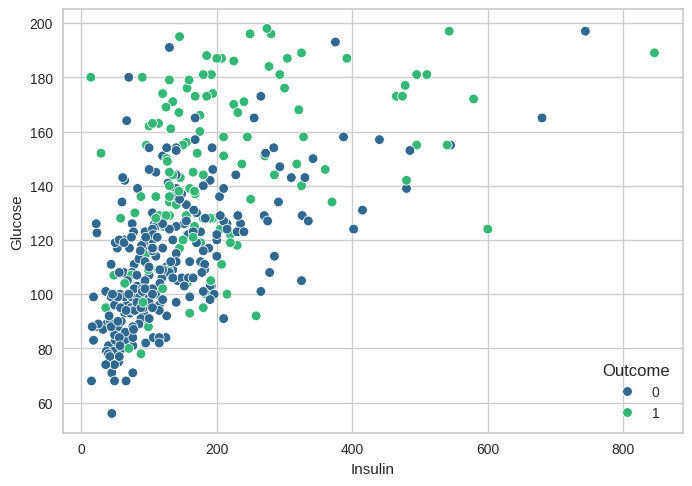

In [9]:
sns.scatterplot(data=df, x=df.Insulin, y=df.Glucose, hue=df.Outcome, palette='viridis')

#1. Setup
Initialize PyCaret's clustering module with the dataset.


In [20]:
s = setup(df)

,Description,Value
0,Session id,2151
1,Original data shape,"(394, 9)"
2,Transformed data shape,"(394, 9)"
3,Numeric features,9
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


Are you wondering what has happened to your data? You should :-) The pycaret package tries to do clever things with your data. Check carefully the function description for setup and make notes about default settings.

In [12]:
?setup



> Why we need to call setup function and what are the key pre-processing tasks automatically performed by PyCaret?



Get all the clustering models list

In [21]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


#Create a model


In [28]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4395,706.8396,0.7238,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]



> When creating a clustering model, such as K-Means clustering using PyCaret's create_model() function, what metrics and values are returned as part of the model creation process?



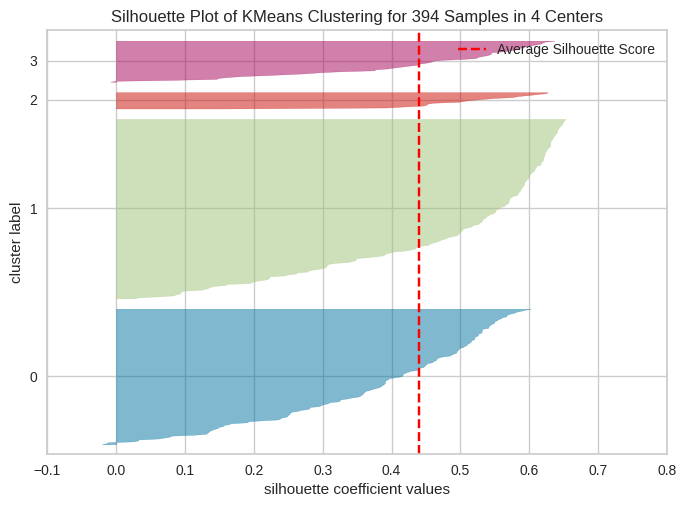

In [23]:
plot_model(kmeans, plot = 'silhouette')

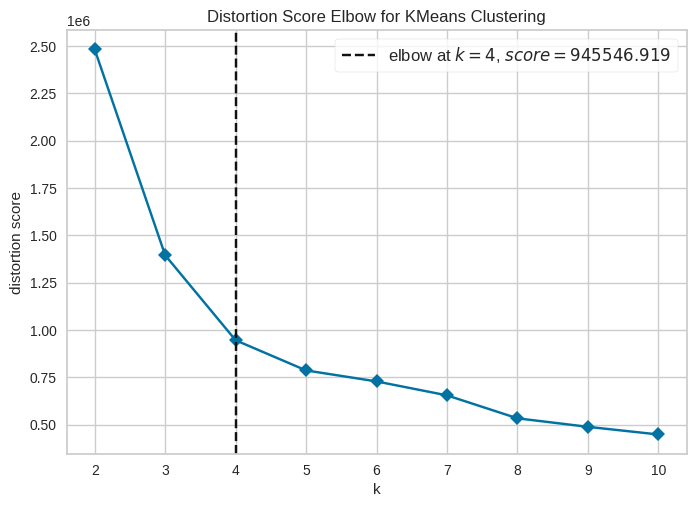

In [24]:
plot_model(kmeans, plot = 'elbow')



> What is the suggesting cluster number? Justify your answer.



In [29]:
centroids = kmeans.cluster_centers_
centroids

array([[3.77622378e+00, 1.33972028e+02, 7.22307692e+01, 3.10699301e+01,
        1.66965035e+02, 3.42482517e+01, 5.55538464e-01, 3.31538462e+01,
        4.89510490e-01],
       [2.73015873e+00, 1.03442412e+02, 6.86402116e+01, 2.68148148e+01,
        7.51798942e+01, 3.10661375e+01, 4.78280423e-01, 2.79788360e+01,
        1.37566138e-01],
       [3.11111111e+00, 1.65833333e+02, 7.34444444e+01, 3.56666667e+01,
        5.48833333e+02, 3.69611114e+01, 6.60666672e-01, 3.45555556e+01,
        6.66666667e-01],
       [4.15909091e+00, 1.50386364e+02, 7.30454545e+01, 2.98863636e+01,
        3.02772727e+02, 3.55272730e+01, 5.75795457e-01, 3.38636364e+01,
        5.00000000e-01]])

<Axes: xlabel='Insulin', ylabel='Glucose'>

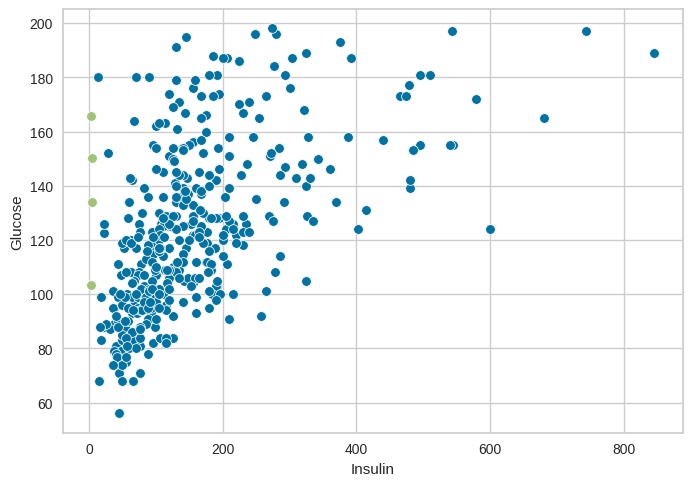

In [31]:
sns.scatterplot(data=df, x=df.Insulin, y=df.Glucose)
sns.scatterplot( x=centroids[:,0], y=centroids[:,1])



> Can you see clusters from scatterplot?



In [32]:
plot_model(kmeans, plot = 'cluster') #plot PCA



> Can you see clusters from PCA?

The reason behind using PCA (Principal Component Analysis) plots for cluster visualization is to reduce the dimensionality of the data and visualize clusters in a lower-dimensional space.





In [33]:
plot_model(kmeans, plot = 'distribution')

PyCaret generates distribution plots to visualize the distribution of data points within each cluster.

Distribution plots help in understanding,
* how the data points are distributed within each cluster.
* potential outliers or anomalies within cluster.
* the density of data points within each cluster.
* similar or dissimilar characteristics among clusters.

In [34]:
plot_model(kmeans, plot = 'distribution', feature="Glucose")



> What information you can get from the above distribution plot?



From the above plot we can see the feature ranges are quite different. As there are different scales in the features of the dataset, so there is definitely a need to normalize the dataset to ensure a better result.  Let's try what effect this has!

We can use normalize=True in setup()


In [53]:
s = setup(df, normalize=True)

,Description,Value
0,Session id,5440
1,Original data shape,"(394, 9)"
2,Transformed data shape,"(394, 9)"
3,Numeric features,9
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [66]:
kmeans = create_model('kmeans', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2411,118.6841,1.7242,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

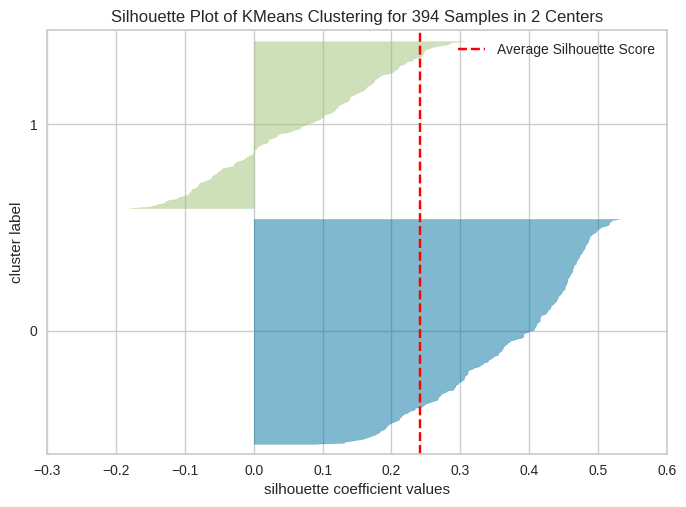

In [56]:
plot_model(kmeans, plot = 'silhouette')

In [57]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.35449646, -0.5251123 , -0.34426986, -0.34673484, -0.399224  ,
        -0.34116356, -0.18832201, -0.48397361, -0.60762415],
       [ 0.47688215,  0.70640106,  0.46312493,  0.46644092,  0.53705133,
         0.45894622,  0.25333795,  0.65105974,  0.81739916]])

In [58]:
plot_model(kmeans, plot = 'cluster')

In [59]:
plot_model(kmeans, plot = 'distribution', feature="Glucose")

In [60]:
plot_model(kmeans, plot = 'distribution', feature="Insulin")

In [42]:
?plot_model

In [61]:
plot_model(kmeans, plot = 'tsne')

In [46]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.3 MB/s eta 0:00:00


In [62]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(df)
pred = kmeans.labels_


In [63]:
pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

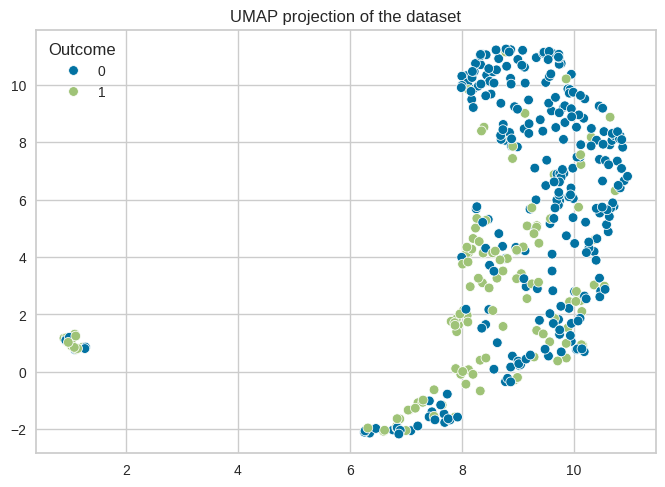

In [64]:
sns.scatterplot(x=embedding[:, 0], y= embedding[:, 1], hue=df.Outcome)
plt.title('UMAP projection of the dataset', fontsize=12);

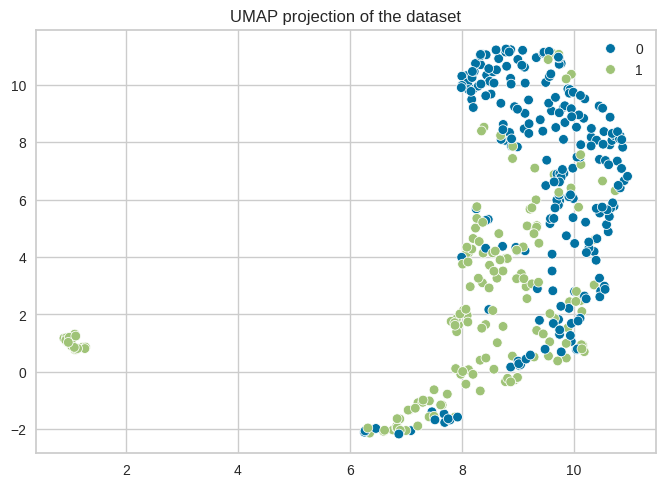

In [65]:
sns.scatterplot(x=embedding[:, 0], y= embedding[:, 1], hue=pred)
plt.title('UMAP projection of the dataset', fontsize=12);

In [67]:
#without giving cluster number
kmeans_4 = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1776,82.7320,1.7859,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

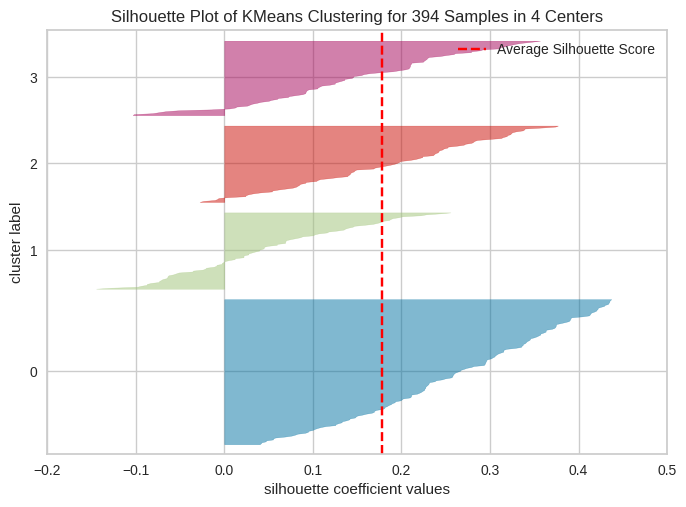

In [68]:
plot_model(kmeans_4, plot = 'silhouette')

In [69]:
centroids = kmeans_4.cluster_centers_
centroids

array([[-0.33822102, -0.52735774, -0.4739962 , -0.78206935, -0.44204088,
        -0.75157684, -0.11205505, -0.51246212, -0.64612737],
       [-0.40527953,  0.93087564,  0.07529821,  0.4005404 ,  0.81391375,
         0.45505506,  0.44294188, -0.09210443,  1.10997208],
       [-0.47845487, -0.46897833,  0.26463568,  0.80300429, -0.25866401,
         0.88332178, -0.28438492, -0.43389458, -0.5441902 ],
       [ 1.56114307,  0.54774749,  0.56945282,  0.28062648,  0.2867978 ,
         0.08332573,  0.05444694,  1.53180536,  0.67125514]])

In [70]:
plot_model(kmeans_4, plot = 'cluster')

In [71]:
plot_model(kmeans_4, plot = 'distribution', feature="Glucose")

In [72]:
plot_model(kmeans_4, plot = 'distribution', feature="Insulin")

In [73]:
plot_model(kmeans_4, plot = 'tsne')

In [78]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(df)
pred_4 = kmeans_4.labels_
pred_4

array([0, 1, 0, 1, 1, 3, 1, 2, 1, 2, 3, 3, 0, 3, 1, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 0, 2, 0, 3, 0, 0,
       2, 0, 0, 0, 0, 2, 1, 3, 2, 3, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 2, 3, 1, 0, 0, 0, 3, 3, 2, 3, 0, 1, 2, 0, 3, 2, 0,
       0, 3, 1, 3, 1, 3, 1, 0, 1, 1, 0, 3, 3, 0, 1, 3, 3, 1, 0, 1, 3, 0,
       2, 1, 2, 3, 0, 0, 3, 2, 1, 2, 1, 3, 0, 3, 1, 3, 0, 0, 0, 2, 2, 0,
       0, 3, 3, 3, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 3, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 0, 3, 0, 1, 2, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0,
       0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 0, 2, 2, 3, 0, 2, 2, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 3, 3, 3, 2, 0, 0,
       2, 2, 1, 0, 3, 1, 0, 2, 1, 1, 1, 2, 3, 0, 3, 3, 0, 0, 1, 0, 0, 0,
       0, 1, 3, 3, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 3, 1, 2, 2, 3, 3, 0, 3,
       0, 0, 0, 3, 1, 2, 0, 0, 2, 3, 0, 1, 0, 0, 1,

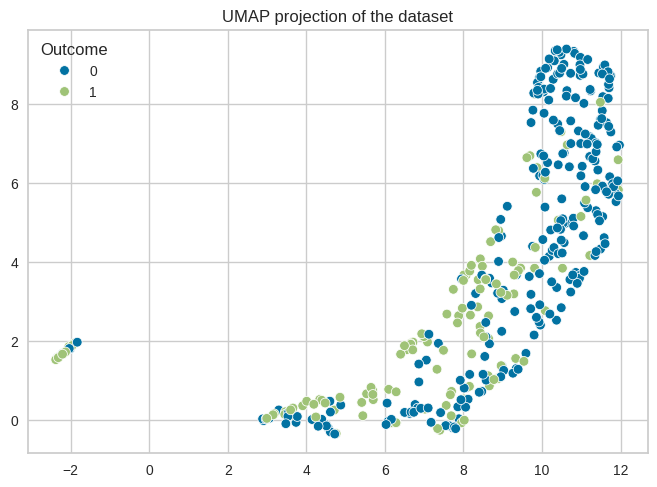

In [75]:
sns.scatterplot(x=embedding[:, 0], y= embedding[:, 1], hue=df.Outcome)
plt.title('UMAP projection of the dataset', fontsize=12);

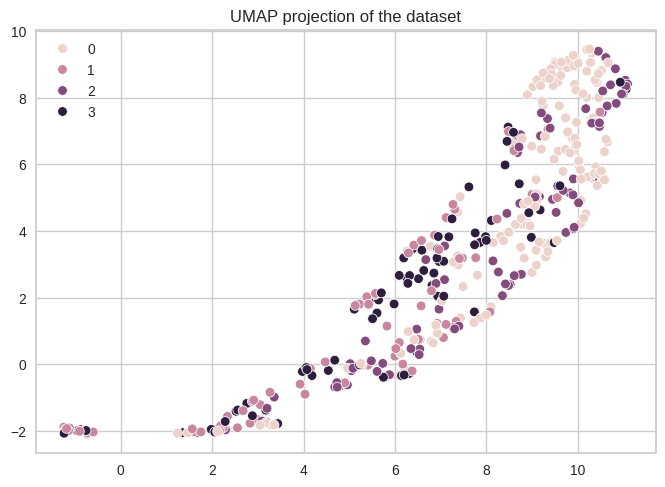

In [79]:
sns.scatterplot(x=embedding[:, 0], y= embedding[:, 1], hue=pred_4)
plt.title('UMAP projection of the dataset', fontsize=12);